In [182]:
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer
from spacy.lang.en import English 
from collections import Counter
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
from textblob import TextBlob
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import string
import csv
#import langid
import emoji
import spacy
import json
import nltk
import re



In [183]:
#BERT Pre-trained
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, LoggingHandler
import numpy as np
import logging

#### Just some code to print debug information to stdout
np.set_printoptions(threshold=100)

logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

# Load Sentence model (based on BERT) from URL
model = SentenceTransformer('distiluse-base-multilingual-cased')

Requirement already up-to-date: sentence-transformers in /usr/local/lib/python3.6/dist-packages (0.3.7.2)
2020-10-04 22:46:59 - Load pretrained SentenceTransformer: distiluse-base-multilingual-cased
2020-10-04 22:46:59 - Did not find folder distiluse-base-multilingual-cased. Assume to download model from server.
2020-10-04 22:46:59 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_distiluse-base-multilingual-cased
2020-10-04 22:47:03 - Use pytorch device: cpu


In [184]:
dataset = pd.read_csv('tweets_df.csv')
dataset = dataset.sample(frac=1)
texts=dataset['tweet'].to_list()
dataset


,tweet,class
227,This Hungarian ring in from the #Israeli zion...,1
361,🌐 Guess what? #Syria The problem with kikes ge...,1
92,Swalwell is a liar. Trump hs been very support...,0
689,"#OTD in 1943, when Jews were being rounded up...",0
21,4 Teaser &amp; Trailers Hits 500K+ Kikes💥💥💥💥💥\...,0
...,...,...
390,@SarafNoah @Zimmlaw175 @tarekwrites @ShowUrJew...,0
666,@Smitty7of7 @featherplus68 @JohnFugelsang Scar...,0
644,⏩ I bet #lol The problem with kikes being rife...,1
685,So much wrong w this. \n\n1) How are American ...,0


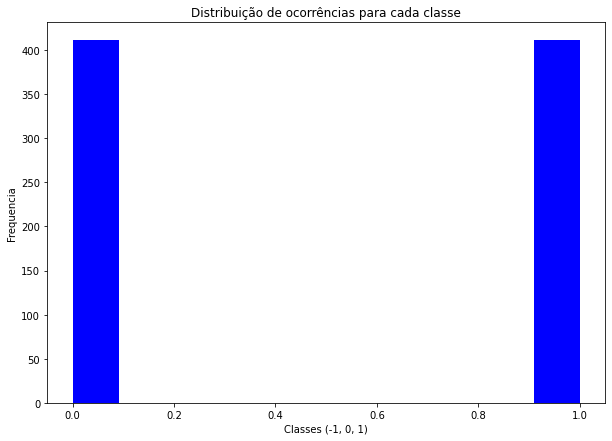

1    411
0    411
Name: class, dtype: int64

In [185]:
plt.figure(figsize = (10, 7)) 
x = dataset['class'] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (-1, 0, 1)')
plt.show()
#-----------------------------------------------------------
dataset['class'].value_counts()

In [180]:
df_lematized = []

#functions
def give_emoji_free_text(text):
	allchars = [str for str in text]
	emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
	clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
	return clean_text

for texts in dataset['tweet']:
  texts = texts.lower() 
  texts = texts.lstrip()
  texts = texts.replace(r"(http|@)\S+", "")
  texts = re.sub(r'http\S+', '', texts)
  texts = texts.replace(r"[^a-z\':_]", "")
  texts = texts.replace(r"(can't|cannot)", 'can not')
  texts = texts.replace(r"n't", ' not')
  texts = give_emoji_free_text(texts)
  texts = re.sub('@[^\s]+','',texts) #remove usernames
  texts = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", texts).split())
  texts = texts.replace(r'#அன்புள்ளசூர்யா', "")
  texts = texts.replace(r'「黒豚、ユダ豚、イタ豚を、俺は見下さん すべて平等に価値がない！」', "")
  texts = texts.replace(r'3⃣', "")
  texts = texts.replace(r'#⃣', "")
  texts = texts.replace(r'7⃣', "")
  texts = texts.replace(r'6⃣', "")
  texts = texts.replace(r'6⃣', "")
  texts = texts.replace(r'1⃣', "")
  texts = texts.replace(r'0⃣', "")
  texts = texts.replace(r'♡', "")
  texts = texts.replace(r'9⃣', "")
  texts = texts.replace(r'4⃣', "")
  texts = texts.replace(r'&', "")
  texts = texts.replace(r'*', "")
  texts = texts.replace(r'[', "")
  texts = texts.replace(r']', "")
  texts = texts.replace(r"::", ": :")
  texts = texts.replace(r"’", "")
  texts = texts.replace(r"|", "")
  texts = texts.replace(r"/", "")
  texts = texts.replace(r"", "")
  texts = texts.replace(r"", "")
  texts = texts.replace(r"'", "")
  texts = texts.replace(r"*", "")
  texts = texts.replace(r"!", "")
  texts = texts.replace(r"?", "")
  texts = texts.replace(r"«", "")
  texts = texts.replace(r"»", "")
  texts = texts.replace(r"(", "")
  texts = texts.replace(r"‘", "")
  texts = texts.replace(r"“", "")
  texts = texts.replace(r"”", "")
  texts = texts.replace(r"“", "")
  texts = texts.replace(r";", "") 
  texts = texts.replace(r",", "")
  texts = texts.replace(r'"', "")
  texts = texts.replace(r':', "")
  texts = texts.replace(r'&', "")
  texts = texts.replace(r")", "")
  texts = texts.replace(r'¿', "")
  texts = texts.replace(r'...', "")
  texts = texts.replace(r'=', "")
  texts = texts.replace(r'-', "")
  texts = texts.replace(r'—', "")
  texts = texts.replace(r'+', "")
  texts = texts.replace(r'.', "")
  print(texts)
  
  df_lematized.append(texts)
dataset['tweet'] = df_lematized

without a doubt the problem with kikes by and large provides conclusive evidence of the bourgeoisie fad
share this the only thing preventing kikes undoubtedly was them 5⃣ 5⃣
the medias slanted view of kikes for all one knows could have been due to not very trustworthy glad
did you know whats happening with kikes for all one knows could have been due to the lack of jobs and growth glad
share this the downfall of kikes heading up in the world is due to the socialist revolution sad
criticized for pandering to the jews thought his generosity to israel would melt jewish hearts but no jews accept every gift as their due
international tv press communication 3 story building was deliberately bombed by the zionazis leading apartheid israel just like in the korean war where us bombers blew up any 2 or more story building and stopped bombing because none remained 2000 lb on gaza apartment complex
imo the medias biased view of kikes being rife with corruption is evidence of vaccinations mad
intern

In [186]:
#Pre-processing using the BERT embeddings
dataset['embedding'] = list(model.encode(dataset['tweet'].to_list()))

In [187]:
#Get the features using the Bert Embedding
features_bert = np.array(dataset['embedding'].to_list())
df_features = pd.DataFrame(data=features_bert, index=None, columns=None)

df_features['class'] = dataset['class']
df_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,class
0,-0.046355,0.050215,0.091253,-0.046068,0.026392,-0.041758,-0.060961,0.006447,-0.041675,0.033578,-0.032276,0.009099,-0.097713,0.036850,-0.020253,0.000085,-0.028994,-0.050250,0.052012,0.036901,-0.008835,0.070401,0.036122,0.004307,-0.027113,0.002161,-0.059799,0.003617,-0.018064,0.045488,0.026207,-0.097206,0.002976,0.003301,0.082644,0.003121,0.074048,0.075960,-0.056389,0.001305,...,-0.030251,0.048798,0.052228,0.031826,-0.031792,0.082798,0.007001,-0.020279,-0.010433,0.019605,0.008996,-0.001224,-0.046395,0.002209,0.022984,0.009574,0.037313,0.014931,0.051982,-0.005758,0.054509,-0.017583,0.080233,-0.082942,0.084354,0.002807,-0.019405,-0.006205,-0.026298,-0.090097,0.060151,0.017099,0.045584,-0.065750,0.013091,0.022115,-0.046410,-0.018332,-0.023850,0
1,0.019232,0.041016,0.012357,0.022419,0.039139,0.069941,0.011356,-0.032162,0.024136,0.023597,0.047474,0.027788,-0.024524,0.053502,0.007078,0.099383,-0.064322,-0.038138,-0.029537,-0.030246,-0.003339,-0.019125,-0.134112,0.011866,-0.035125,-0.006209,-0.044850,0.015152,0.046808,0.003625,0.049087,0.008862,-0.029867,0.004750,0.047607,0.011702,0.013279,0.023233,0.038379,-0.051773,...,0.006069,0.018448,0.001239,0.025119,-0.070748,-0.005867,-0.022738,-0.048747,0.011972,-0.032707,-0.029404,0.071289,0.047106,0.007324,0.025432,-0.002781,-0.032130,0.012667,0.037969,0.001808,0.089208,-0.040509,0.010246,0.008576,-0.029385,-0.000959,-0.050838,-0.047191,-0.019112,-0.071222,0.027148,-0.007704,-0.007345,-0.072694,0.000977,0.075496,0.000873,-0.019299,-0.018569,0
2,-0.044436,0.030946,0.038103,-0.039286,0.013657,-0.071701,0.004908,0.010446,0.003873,0.038612,-0.021942,0.080376,-0.029786,-0.049612,-0.117221,0.028254,-0.000289,-0.005832,0.002497,0.025020,0.017160,0.024752,0.008268,-0.007127,-0.014696,0.019288,-0.087834,-0.022960,-0.050401,0.033429,0.004663,-0.031631,0.052397,0.023336,0.016801,-0.003289,-0.051154,0.040727,-0.051167,-0.047940,...,0.014317,0.029331,0.048766,-0.003229,-0.034274,0.067696,0.045105,-0.022569,0.007805,-0.036342,-0.060558,-0.060917,-0.050207,0.015286,-0.030849,0.013899,-0.010687,0.053175,-0.076538,-0.004429,0.013065,0.038983,0.086895,0.004066,0.007076,0.043170,-0.017429,0.004342,0.046740,-0.039989,-0.017822,0.036689,0.070767,-0.061624,0.000817,0.000480,-0.068086,0.015994,0.041505,0
3,-0.098730,-0.028656,-0.006338,-0.060691,0.029505,-0.010288,-0.046735,-0.006656,-0.067928,-0.009134,-0.094973,0.051611,-0.010955,-0.000244,-0.017821,0.055347,0.011286,-0.031284,0.000327,0.040511,-0.097789,0.009777,0.076820,0.036342,-0.073515,-0.026421,-0.030272,-0.029749,0.002887,0.008165,0.075362,-0.068380,0.046461,0.036056,-0.015418,0.053737,0.010955,0.015801,-0.065379,-0.053861,...,0.025473,-0.039442,0.047721,-0.073102,-0.010755,0.063148,0.005312,-0.021168,-0.002651,0.028220,0.015030,-0.100229,-0.116008,-0.009053,0.029796,-0.047516,0.012431,-0.010625,0.015629,-0.029716,0.018454,-0.000669,0.089218,-0.035785,0.018291,0.063813,0.003411,0.044557,-0.042974,-0.035419,-0.001491,0.041620,0.048528,-0.054629,-0.004910,0.007024,-0.074771,0.073333,0.023427,0
4,-0.018995,-0.053856,0.019533,-0.027219,-0.034063,0.030652,-0.024601,0.003283,0.005793,-0.037830,-0.015878,0.032985,-0.010436,0.046375,-0.023143,0.045381,0.013229,-0.032156,0.040080,-0.067705,-0.043532,-0.024036,0.034140,0.031592,-0.035258,-0.070304,-0.046125,0.050325,0.000388,-0.036411,-0.005805,-0.009843,0.032870,-0.006601,0.005672,-0.031422,0.016425,-0.026617,0.064825,-0.034015,...,-0.030259,0.015251,0.034181,-0.040487,0.011387,0.044197,0.024272,0.012570,0.001275,-0.004388,0.068993,-0.000801,-0.031421,-0.017704,-0.020320,0.021859,-0.017815,-0.023818,0.013052,-0.026151,0.039985,-0.033031,-0.033966,-0.018968,-0.008392,-0.058787,-0.101969,-0.016545,0.007096,-0.046818,0.052450,0.009438,0.052446

In [188]:
#Separating features and class
X = df_features.iloc[:, :-1]
Y = df_features.iloc[:,-1]
print('---------------------------(features)-------------------------------')
print(X)
print('---------------------------(class)----------------------------------')
print(Y)

---------------------------(features)-------------------------------
          0         1         2    ...       509       510       511
0   -0.046355  0.050215  0.091253  ... -0.046410 -0.018332 -0.023850
1    0.019232  0.041016  0.012357  ...  0.000873 -0.019299 -0.018569
2   -0.044436  0.030946  0.038103  ... -0.068086  0.015994  0.041505
3   -0.098730 -0.028656 -0.006338  ... -0.074771  0.073333  0.023427
4   -0.018995 -0.053856  0.019533  ... -0.041162 -0.025589 -0.006202
..        ...       ...       ...  ...       ...       ...       ...
817 -0.046620  0.026134  0.069394  ... -0.096767  0.024256  0.048059
818 -0.012161  0.044161  0.038835  ... -0.085384  0.112596  0.021616
819  0.062374  0.030825 -0.003602  ... -0.045013  0.029956 -0.009542
820  0.009746  0.022558  0.016437  ... -0.032211  0.041463 -0.018700
821 -0.035483  0.013663  0.020306  ... -0.047298  0.040493 -0.035819

[822 rows x 512 columns]
---------------------------(class)----------------------------------
0      0

In [189]:
#Separating test and training data
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Cross-validation
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.508228 (0.048966)
LDA: 0.481026 (0.045680)
KNN: 0.476434 (0.053559)
CART: 0.512890 (0.055496)
NB: 0.465641 (0.038319)
SVM: 0.492984 (0.045453)


In [190]:
#MLP classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=42, max_iter=10000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))

#Score
model_tester(X, Y)

Score do classificador: 51.09
